## LINEAR REGRESSION FOR CAR PRICE PREDICTION

**1**.**SIMPLE LINEAR REGRESSION**


Linear regression is a statistical metthod that helps in showing the relationship between variables. It is one of the simplest supurvised machine learning algorithm to obtain the relationship between dependent variable and independent variable which helps in building models for prediction.


In the case of simple linear regression, it helps in finding relationship between one independent variable and the corresponding dependent variable .

**1.1** **OBJECTIVE**


To predict output variable which is price here for the given set of input variables from the dataset.

**1.2** **Preperation** 

**1.21** Importing the data

Importing the necessary datasets for data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset using read_excel() function in pandas library.

In [2]:
data = pd.read_csv("/content/CarPrice_Assignment.csv")

Viewing the dataset.

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**1.22** Exploratory Data Analysis

In order to understand the data very well, EDA is performed. It helps in uncovering the underlying structure of dataset and exposes the patterns,trends and distributions of the data.

In [ ]:
data.shape

(205, 26)

The shape(dimension) of the dataset is obtained. There are 26  columns with 205 records.

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

All column names are obtained.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Using info() function, basic information about the dataset is obtained. From this it is clear that there is no missing values in the dataset, if there was some methods should be performed to remove it.

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Basic descriptive statistics (mean,standard deviation etc) of the attributes / columns which contains numerical values are gained using describe() function.

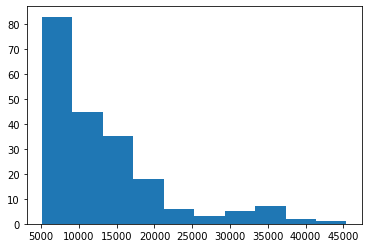

In [8]:
plt.hist(data['price'])
plt.show()

The dependent variable is right skewed.

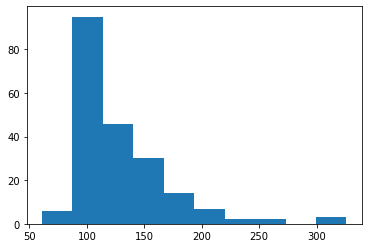

In [9]:
plt.hist(data['enginesize'])
plt.show()

The independent variable is also right skewwed.

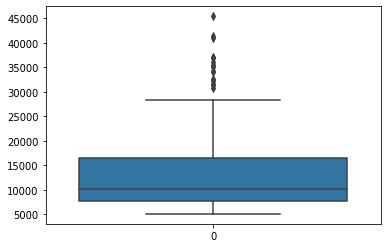

In [5]:
sns.boxplot(data=data['price'])

There are some outliers in the pt\rice variable

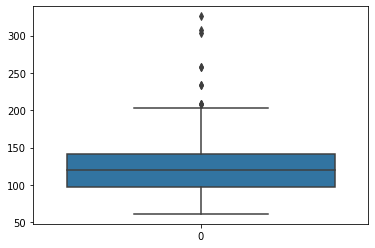

In [6]:
sns.boxplot(data=data['enginesize'])

There are outliers in independent variable also.

Heatmap of the dataset is plotted for better understanding on the relationship between the variables.Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

In [3]:
corr = pd.DataFrame(data).corr()
corr.shape

(16, 16)

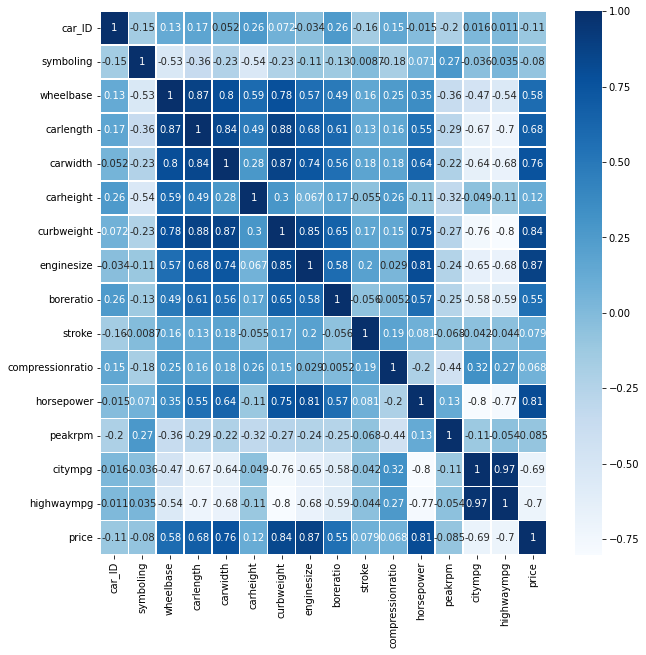

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(corr , cmap = 'Blues', linewidths=0.30, annot = True)

In a heatmap , each aquares shows the correlation(measure of linear relationship) between variables on each axis. The values ranges from -1 to 1. Values close to zero represents no or mere correation while values which are closer to 1 represents high positive correlation. Values closer to -1 shows negative correlation also. Here in this dataset variables that are highly correlated to car price are car width, curb weight, engine size , horsepower. 

So for building a linear regression model, the chosen dependent variable is engine size.

A scatter plot  plots the  data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Here Scater plot of engine size and the car price is plotted in order to identify whether it is in a linear relationship.

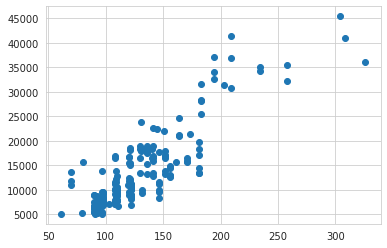

In [ ]:
plt.scatter(data['enginesize'],data['price'], marker = 'o')

Price and the engine size are in a linear relationship.

In order to build a simple linear regression model, engine size is taken as the independent variable(X) while the target/dependent variable(Y) is price of the car.The equation is given as : Y = β0 + β1X + ε

In [ ]:
Y = data["price"]
X = data["enginesize"]

Next is splitting the data into training and testing sets. Using the training set, model is built and then perform the model on the testing set. Then divides the training and testing sets into a 80% and 20% ratio, respectively.The splitting of the data is done by importing train_test_split from the
sklearn.model_selection library.The  train_test_split is a function for splitting data arrays into two subsets: for training data and for testing data. With this function, you don’t need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, random state is specified for the operation. The following parameters (arguments) are
included in the train_test_split function. .

x, y : The first parameter is the dataset selected to use.

 train_size : sets the size of the training dataset. There are three options: None,
which is the default, Int, which requires the exact number of samples, and float, which ranges from
0.1 to 1.0.

test_size :specifies the size of the testing dataset. The default state suits
the training size. It will be set to 0.25 if the training size is set to default.

random_state :sets the seed for random split and ensures same split is reproducible

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [ ]:
X_train

160     98
98      97
127    194
47     258
91      97
      ... 
113    120
64     122
15     209
125    151
9      131
Name: enginesize, Length: 164, dtype: int64

In [ ]:
Y_train

160     7738.000
98      8249.000
127    34028.000
47     32250.000
91      6649.000
         ...    
113    16695.000
64     11245.000
15     30760.000
125    22018.000
9      17859.167
Name: price, Length: 164, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**1.24 Building the model**

There are many libraries to build the linear regression model in python.Here,  statsmodels.api library from statsmodels package is used to build
the linear regression model.By default, the statsmodels library fits a line that passes through the
origin. But if we observe the simple linear regression equation Y = β0 + β1X, it has an intercept
value as β0. So, to have an intercept, we need to add the add_constant attribute manually.

Then building the linear regression model using OLS present in the statsmodels.api.

In [ ]:
model = sm.OLS(Y_train , X_train_sm).fit()

In [ ]:
model.params

const        -9423.941046
enginesize     180.109333
dtype: float64

The summary of the model is obtained by summary() function. From the summary table, important
metrics such as adjusted R-squared, F-statistic & p-value and Durbin-Watson Statistic are observed.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     682.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           5.56e-60
Time:                        07:54:34   Log-Likelihood:                -1574.1
No. Observations:                 164   AIC:                             3152.
Df Residuals:                     162   BIC:                             3158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9423.9410    907.170    -10.388      0.000   -1.12e+04   -7632.539
enginesize   180.1093      6.893     26.131      0.000     166.498     193.720
==============================================================================
Omnibus:                       25.148   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.763
Skew:                           0.877   Prob(JB):                     2.83e-08
Kurtosis:                       4.419   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An R-squared result of 70 to 100 indicates that the model explains the ouput well.Here, adjusted
R-squared value is 0.807, which means that 80.7% of the price variance can be explained by the
enginesize column using this line. p-value for F statistics is less than significance level of 0.05 and it is
concluded that regression coefficents are significant (not equal to zero). Durbin-Watson test is to
check the autocorrelation (correlation of error terms). No autocorrelation is implied by a value of
2, below 2 is positive correlation and above 2 is negative correlation. Usually 1.5 to 2.5 is taken as
a safe choice. Here it is 2.049.

**Visualising the fitted line to train data set**

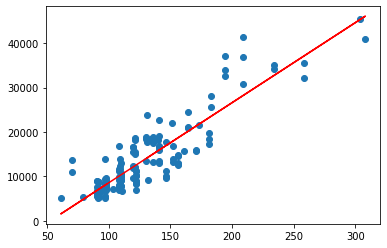

In [ ]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, -9423.941046+180.109333 *X_train,'r')
plt.show()

The redline is the fitted regression line (price = -9423.941046+180.109333enginesize) for training data.

**1.25** **CONCLUSION**

There is a positive correlation between the enginesize which is the independent variable and the price which is the dependent one. The linear regression line is the best fit for the model . By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum.